<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/0503_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multicass Classification

In [1]:
import numpy as np
import random
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.svm import SVC

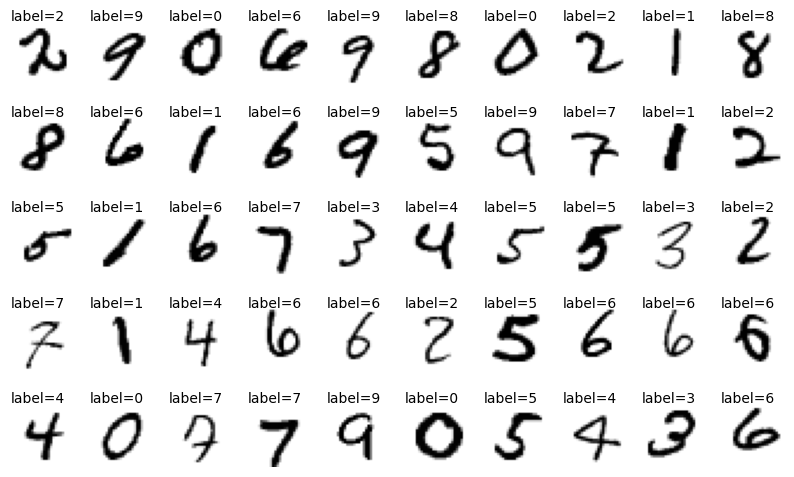

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        idx = random.randint(0, 60000)
        axs[i, j].imshow(x_train[idx], cmap="gray_r")
        axs[i, j].axis("off")
        axs[i, j].text(0, 0, f"label={y_train[idx]}")
plt.show()

In [3]:
m_train, rows, cols = x_train.shape
m_test = x_test.shape[0]

x_train = x_train.reshape((m_train, rows * cols))
x_test = x_test.reshape((m_test, rows * cols))

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
model = SVC(random_state=42)
model.fit(x_train[:2000], y_train[:2000])

SVC(random_state=42)

$ \hat{y} = prediction $

In [6]:
y_hat = model.predict(x_test[:50])
print(y_test[:50] == y_hat)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [7]:
y_hat

array([7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4], dtype=uint8)

In [8]:
y_test[:50]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4], dtype=uint8)

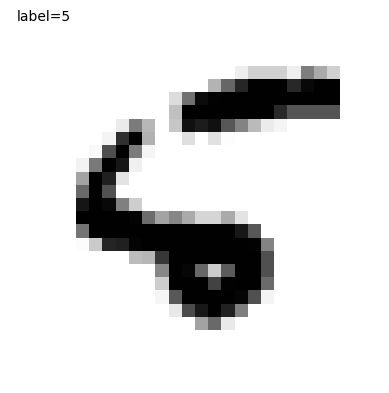

In [9]:
plt.imshow(x_test[8].reshape(28, 28), cmap="gray_r")
plt.axis("off")
plt.text(0, 0, f"label={y_test[8]}")
plt.show()

In [10]:
scores0 = model.decision_function(x_test[:10])
scores0.round(2)

array([[ 2.78, -0.29,  6.18,  7.24,  4.78,  3.86,  0.71,  9.31,  1.76,
         8.27],
       [ 4.19,  2.74,  9.3 ,  7.27,  1.71,  6.27,  8.28, -0.3 ,  5.2 ,
         0.72],
       [-0.3 ,  9.3 ,  7.26,  2.78,  2.79,  1.79,  5.91,  8.24,  4.95,
         1.75],
       [ 9.31, -0.3 ,  5.16,  4.07,  0.72,  7.25,  8.22,  1.81,  2.76,
         6.14],
       [ 3.75, -0.3 ,  7.22,  0.73,  9.3 ,  2.79,  5.1 ,  6.13,  1.75,
         8.29],
       [-0.3 ,  9.31,  7.25,  4.85,  3.78,  1.74,  0.74,  8.26,  6.23,
         2.78],
       [-0.29,  0.72,  1.73,  5.08,  9.3 ,  6.24,  2.74,  7.19,  4.19,
         8.28],
       [-0.3 ,  0.73,  2.78,  5.16,  8.28,  6.2 ,  1.78,  6.2 ,  5.02,
         9.29],
       [ 3.92, -0.28,  9.28,  1.74,  5.2 ,  7.24,  8.26,  0.72,  3.89,
         5.11],
       [ 1.73, -0.29,  3.75,  3.76,  7.28,  3.79,  0.73,  8.29,  6.08,
         9.3 ]])

In [11]:
class_id = scores0[8].argmax()
class_id

2

In [12]:
from sklearn.multiclass import OneVsRestClassifier

In [13]:
ovr_model = OneVsRestClassifier(SVC(random_state=42))
ovr_model.fit(x_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [14]:
y_hat = ovr_model.predict(x_test[:50])
print(y_test[:50] == y_hat)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [15]:
len(ovr_model.estimators_)

10

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

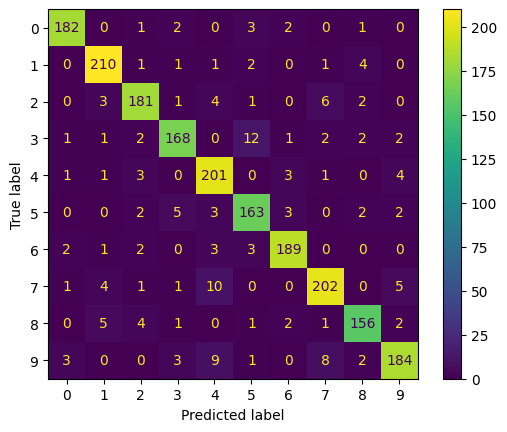

In [17]:
y_train_hat = cross_val_predict(model, x_train[:2000], y_train[:2000], cv=3)
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_hat)
plt.show()

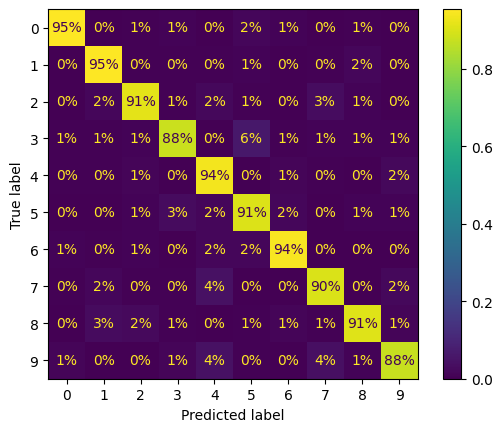

In [18]:
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_hat,
                                        normalize="true", values_format=".0%")
plt.show()

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
model = SGDClassifier(random_state=42)
model.fit(x_train, y_train)

SGDClassifier(random_state=42)

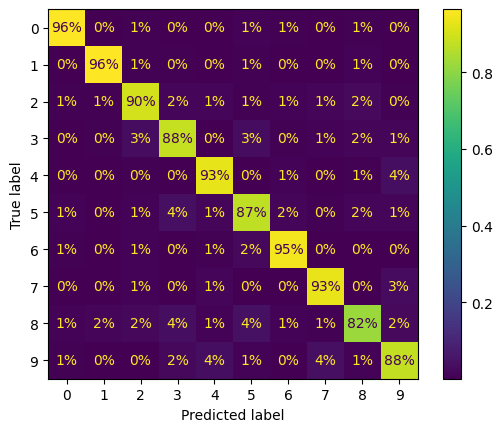

In [21]:
y_train_hat = cross_val_predict(model, x_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_hat,
                                        normalize="true", values_format=".0%")
plt.show()